# Simulating the game Chutes and Ladders

This is based on an article I found at
http://www.datagenetics.com/blog/november12011/

I am using this as a basis to try a couple of things with Bayes.

In [1]:
%matplotlib inline
%load_ext version_information

In [2]:
# Standard Library
from fractions import Fraction as frac

# Third Party Libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

%version_information matplotlib,numpy

Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.1.0
OS Darwin 16.6.0 x86_64 i386 64bit
matplotlib 2.0.2
numpy 1.13.1
Mon Jul 24 12:14:07 2017 MDT

## Board Model

We can define the positions of the chutes and ladders with dictionaries. The dictionary keys are the board positions where a chute or ladder starts, and the dictionary values are the board positions where the chute or ladder ends.

In [3]:
## Board definition from original article
ladders = {1:38, 4:14, 9:31, 21:42, 28:84, 36:44, 51:67, 71:91, 80:100}
chutes  = {16:6, 48:26, 49:11, 56:53, 62:19, 64:60, 87:24, 93:73, 95:75, 98:78}

## Moving a player

The game is played by rolling a die or flipping a spinner; in either case, the player moves a random number from 1 to 6. After that move, we need to check and resolve a present chute or ladder. The code needs to report the type of move and the landing spot so we can do statistics on how frequently each chute and ladder is used.

In [4]:
def move(p):
    p += np.random.randint(1,7)
    movetype = ['n',p]
    if p in ladders.keys():
        movetype[0] = 'l'
        p = ladders[p]
    if p in chutes.keys():
        movetype[0] = 'c'
        p = chutes[p]
    return p,movetype

## Playing a game

We only need to simulate a single player, since there are no interactions between players. Because the game has the potential for an infinite loop, we need to put some control into the simulation to exit after a (large) number of moves. Games are only valid if they exit normally.

In [5]:
def play(nmax=1000):
    n=0        # count number of turns
    p=0        # start at position 0
    win=False  # has the player won yet?
    moves = np.zeros(nmax).astype(int)
    chute_hits = np.zeros(nmax).astype(int)
    ladder_hits = np.zeros(nmax).astype(int)
    
    while n<nmax and not win:
        p,t  = move(p)
        n += 1
        moves[n] = p
        if p >= 100:
            win = True
        if t[0]=='l':
            ladder_hits[n] = t[1]
        elif t[0]=='c':
            chute_hits[n] = t[1]
            
    return {'moves':moves, 'turns':n, 'valid':n<nmax,
            'ladders':ladder_hits, 'chutes':chute_hits}

Total Turns: 49
Ladders Hit: 3
	51:	1
	71:	2
Chutes Hit: 6
	98:	2
	16:	1
	87:	1
	56:	1
	95:	1


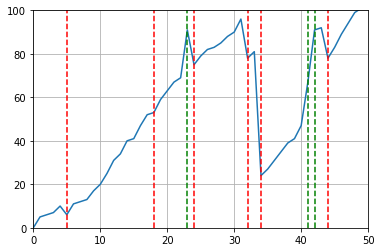

In [6]:
result = play()
print("Total Turns: {0}".format(result['turns']))
print("Ladders Hit: {0}".format((result['ladders']!=0).sum()))
for l in set(result['ladders']):
    if l==0:
        continue
    print("\t{0}:\t{1}".format(l,len(np.where(result['ladders']==l)[0])))
print("Chutes Hit: {0}".format((result['chutes']!=0).sum()))
for c in set(result['chutes']):
    if c==0:
        continue
    print("\t{0}:\t{1}".format(c,len(np.where(result['chutes']==c)[0])))

plt.plot(result['moves'][:result['turns']+1])
for l in np.where(result['ladders']!=0)[0]:
    plt.plot([l,l],[0,100],'g--')
for c in np.where(result['chutes']!=0)[0]:
    plt.plot([c,c],[0,100],'r--')

plt.ylim(0,100)
plt.xlim(0,int(5*round(result['turns']/5.)))
plt.grid();

In [7]:
result['chutes'][(result['chutes']!=0)]

array([16, 56, 95, 98, 87, 98])